In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"C:\Users\Win 10 Pro\Downloads\scrap price (1).csv")

In [3]:
# Null handling
df.isnull().sum()

ID                    4
symboling             4
name                  4
fueltypes             4
aspiration            4
doornumbers           4
carbody               4
drivewheels           4
enginelocation        4
wheelbase             4
carlength             4
carwidth              4
carheight             4
curbweight            4
enginetype            4
cylindernumber        4
enginesize            4
fuelsystem            4
boreratio             4
stroke                4
compressionratio      4
horsepower            4
peakrpm               4
citympg               4
highwaympg            4
price                 4
Unnamed: 26         209
Unnamed: 27         209
dtype: int64

In [4]:
# Column handling
df.drop(['ID','name','symboling','Unnamed: 26','Unnamed: 27'],axis =1, inplace = True)

In [5]:
df.dropna(inplace=True)

In [6]:
# Noise handling
for i in df.columns:
    print(i,df[i].sort_values().unique(),'\n',sep = '\n')

fueltypes
['diesel' 'gas']


aspiration
['std' 'turbo']


doornumbers
['four' 'two']


carbody
['convertible' 'hardtop' 'hatchback' 'sedan' 'wagon']


drivewheels
['4wd' 'fwd' 'rwd']


enginelocation
['front' 'rear']


wheelbase
['"69*/"' '#$' '#$%' '$%98' '100.4' '101.2' '102' '102.4' '102.7' '102.9'
 '103.3' '103.5' '104.3' '104.5' '104.9' '105.8' '106.7' '107.9' '108'
 '109.1' '110' '112' '113' '114.2' '115.6' '120.9' '86.6' '88.4' '88.6'
 '89.5' '91.3' '93' '93.1' '93.3' '93.7' '94.3' '94.5' '95.1' '95.3'
 '95.7' '95.9' '96' '96.1' '96.3' '96.5' '96.6' '96.9' '97' '97.2' '97.3'
 '98.4' '98.8' '99.1' '99.2' '99.4' '99.5' '99.8']


carlength
[141.1 144.6 150.  155.9 156.9 157.1 157.3 157.9 158.7 158.8 159.1 159.3
 162.4 163.4 165.3 165.6 165.7 166.3 166.8 167.3 167.5 168.7 168.8 168.9
 169.  169.1 169.7 170.2 170.7 171.2 171.7 172.  172.4 172.6 173.  173.2
 173.4 173.5 173.6 174.6 175.  175.4 175.6 175.7 176.2 176.6 176.8 177.3
 177.8 178.2 178.4 178.5 180.2 180.3 181.5 181.7 183.1 1

In [7]:
for i in df.columns:
    df = df[~df[i].isin(['"69*/"', '#$', '#$%' ,'$%98','#$%','(OP*/)','$%98','po/*','E#$'])]

In [8]:
# Assign Datatype 
cat= []
for i in df.columns:
    try:
        df[i] = df[i].astype('float64')
    except:
        cat.append(i)

In [9]:
cat

['fueltypes',
 'aspiration',
 'doornumbers',
 'carbody',
 'drivewheels',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [10]:
# df['fueltypes'].replace({'diesel':1, 'gas':2})
# df['aspiration'].replace({'std':1, 'turbo':2})
# df['doornumbers'].replace({'four':1, 'two':2})
# df['carbody'].replace({'convertible':1, 'hardtop':2, 'hatchback':3, 'sedan':4, 'wagon':5})
# df['drivewheels'].replace({'4wd':1, 'fwd' :2,'rwd':3,})
# df['enginelocation'].replace({'front':1, 'rear':2})
# df['enginetype'].replace({'dohc':1, 'dohcv':2, 'l':3, 'ohc':4, 'ohcf':5, 'ohcv':6, 'rotor':7})
# df['cylindernumber'].replace({'eight':1, 'five':2, 'four':3, 'six':4, 'three':5, 'twelve':6, 'two':7})
# df['fuelsystem'].replace({'1bbl':1, '2bbl':2, '4bbl':3, 'idi':4, 'mfi':5, 'mpfi':6, 'spdi':7, 'spfi':8})

C:\Users\Win 10 Pro\AppData\Local\Temp\ipykernel_16232\3224120032.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True)


<AxesSubplot: >

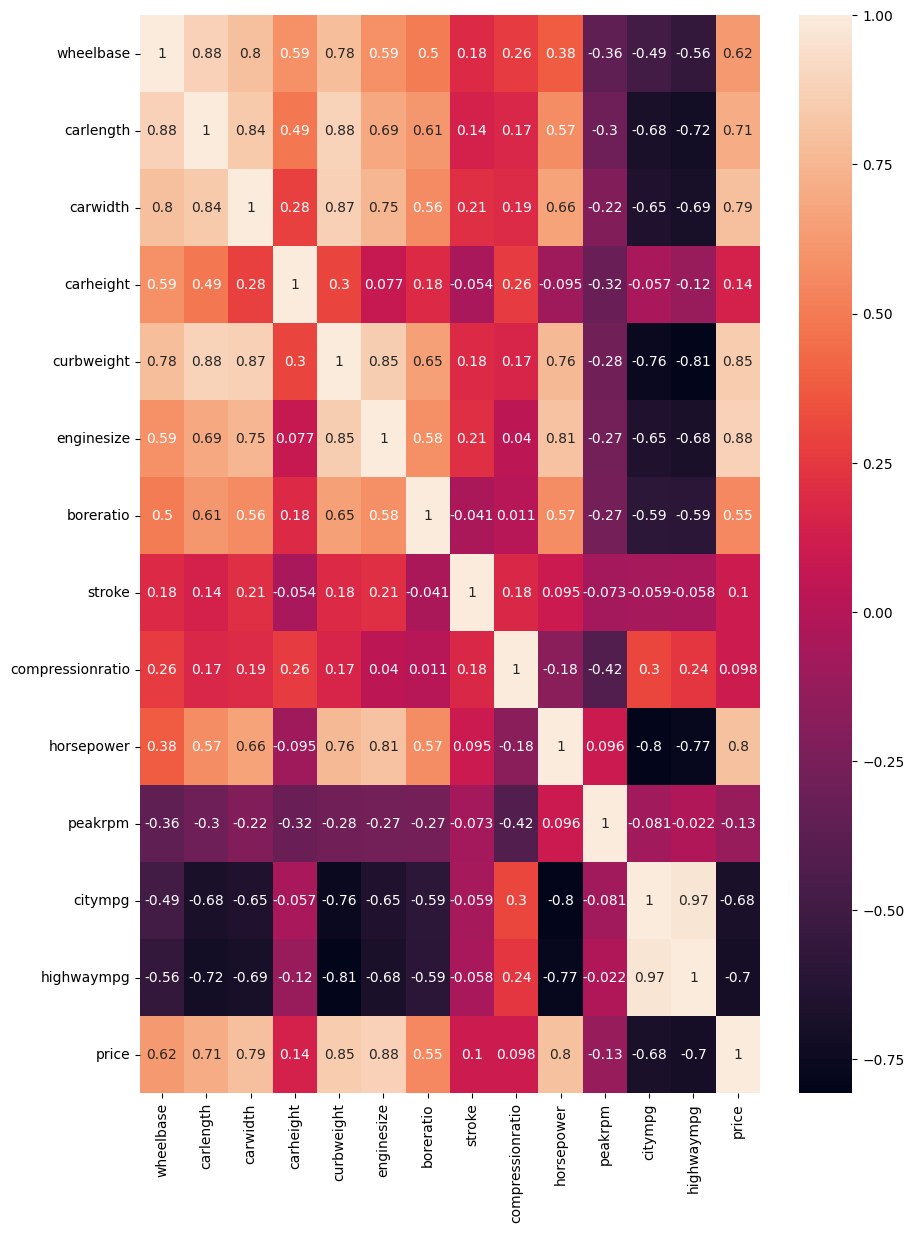

In [11]:
# Correltion Heatmap
plt.figure(figsize= (10,14))
sns.heatmap(df.corr(), annot =True)

In [12]:
# Drop high correlation columns
df1 = df.drop([ 'curbweight','horsepower'],axis=1)

<AxesSubplot: xlabel='enginesize', ylabel='price'>

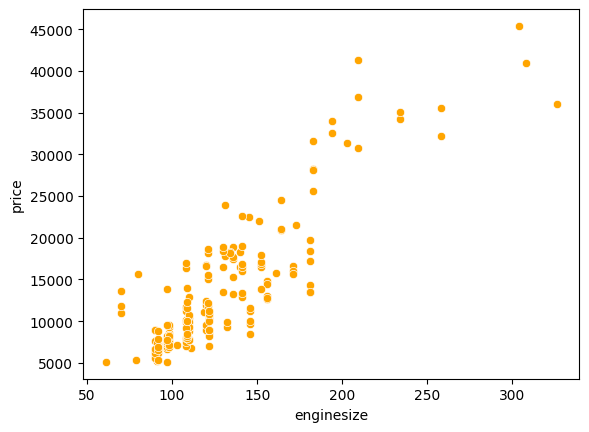

In [13]:
sns.scatterplot(df,x='enginesize',y='price',color='orange')

In [14]:
# Outlier Analysis
num = df1.drop(cat, axis=1).columns.tolist()
num

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

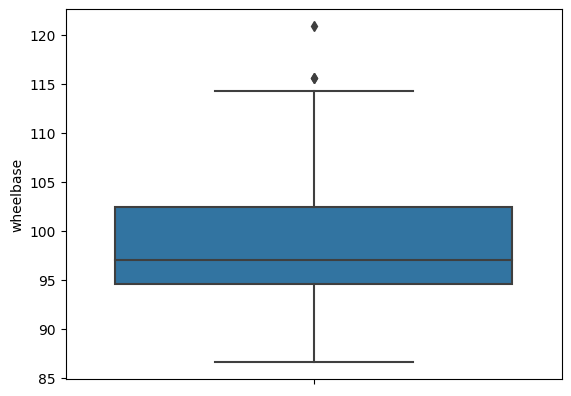

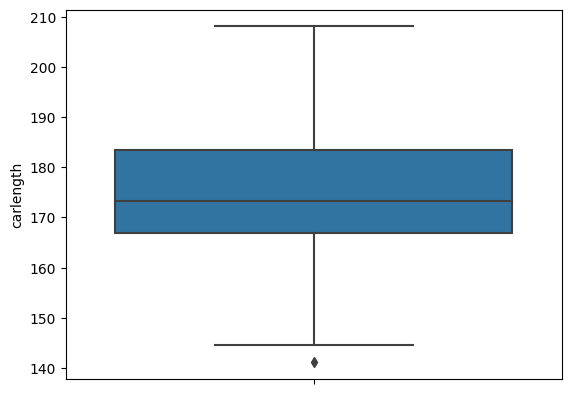

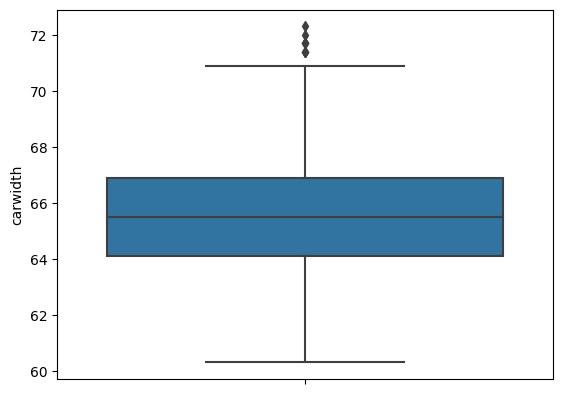

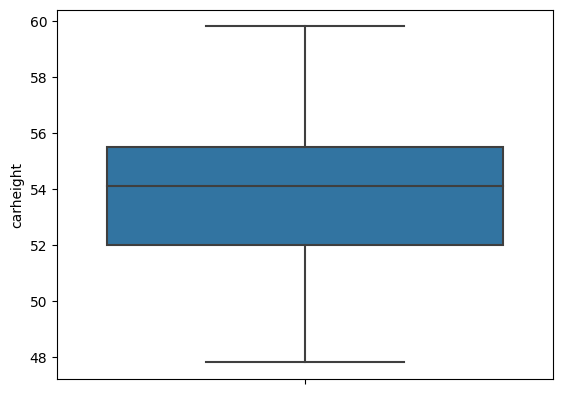

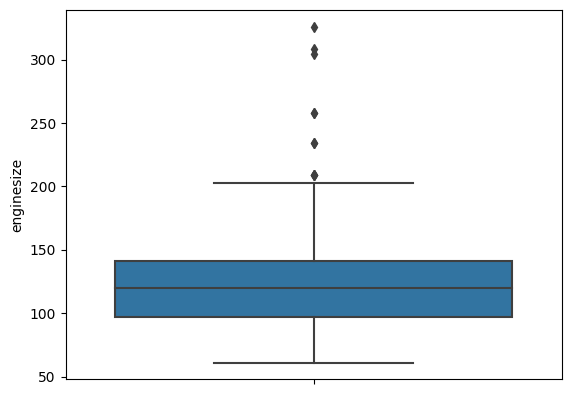

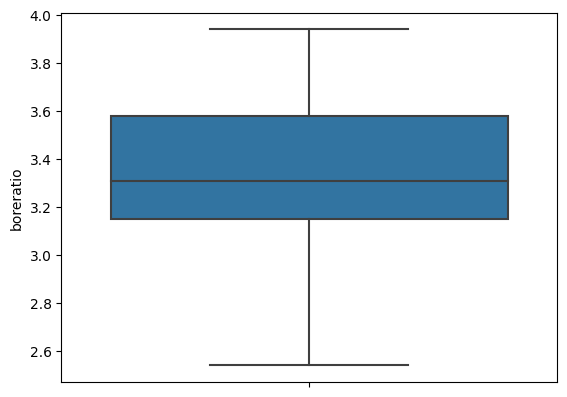

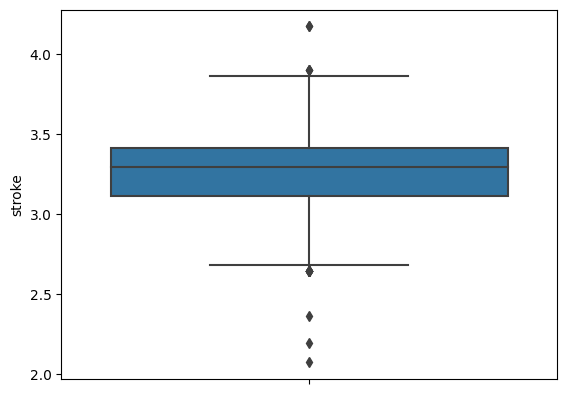

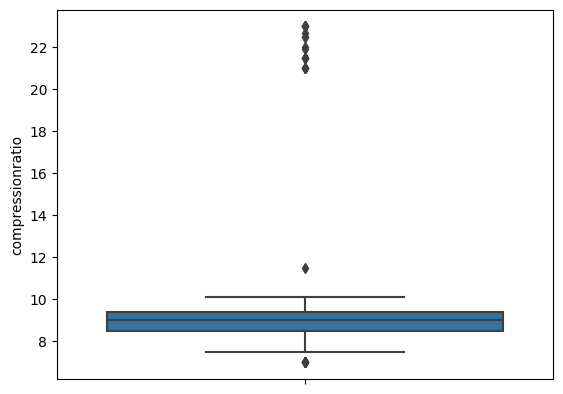

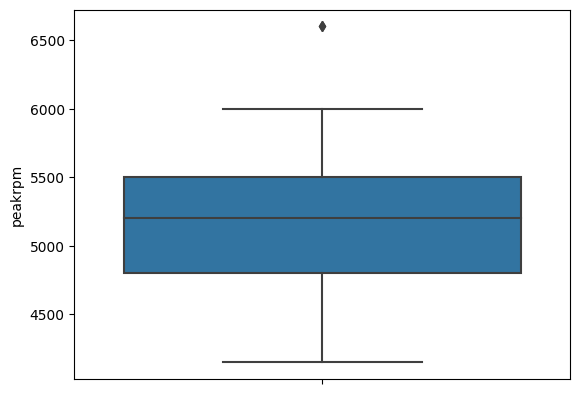

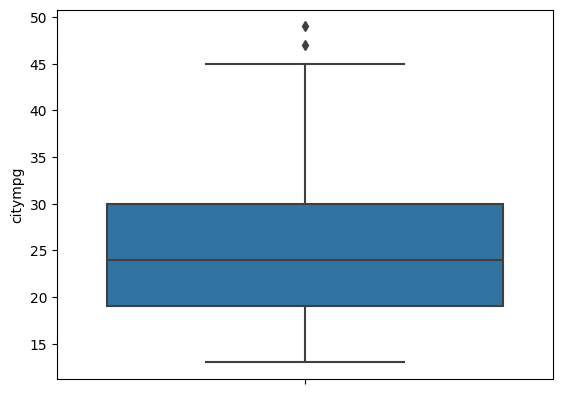

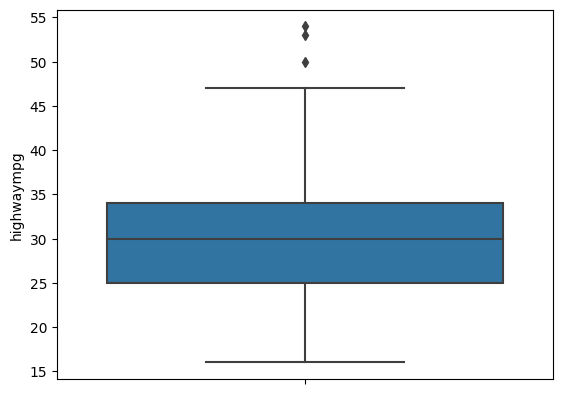

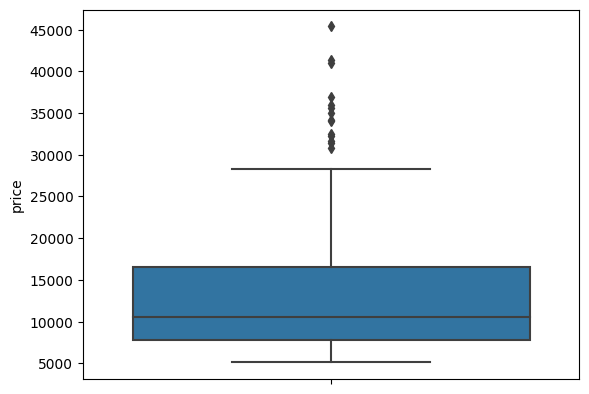

In [15]:
for i in num:
    plt.figure()
    sns.boxplot(y=i,data=df1)

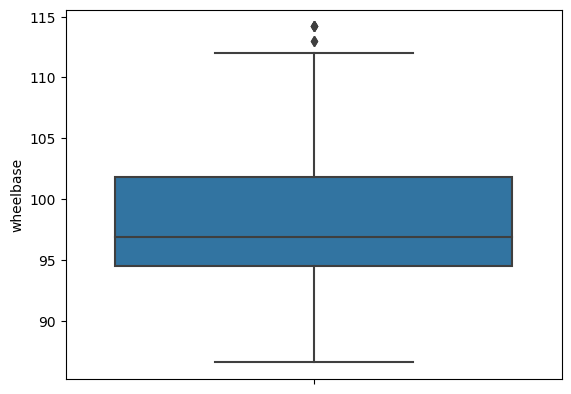

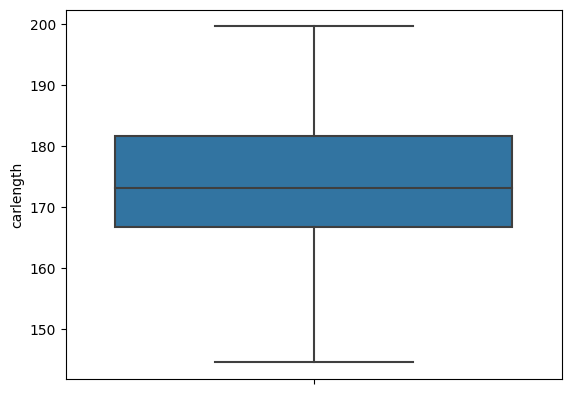

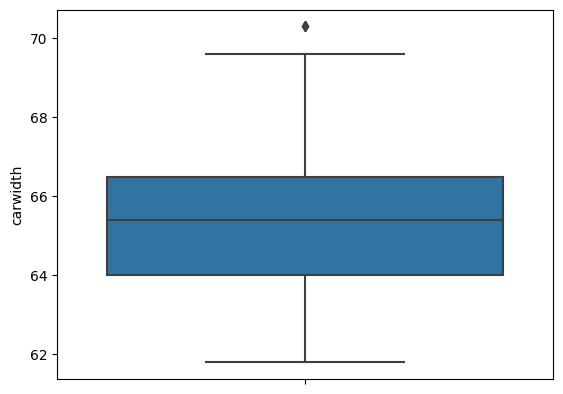

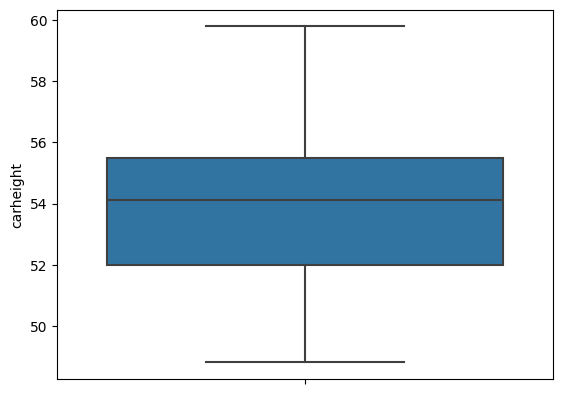

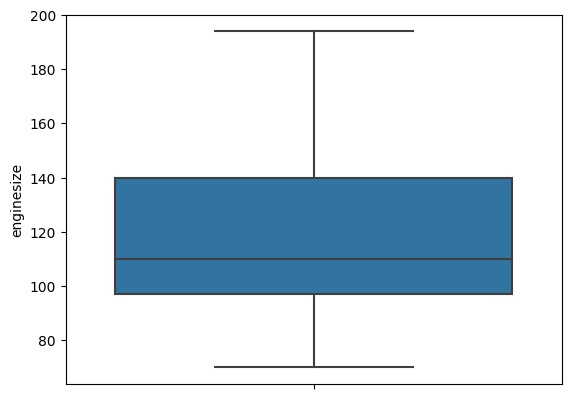

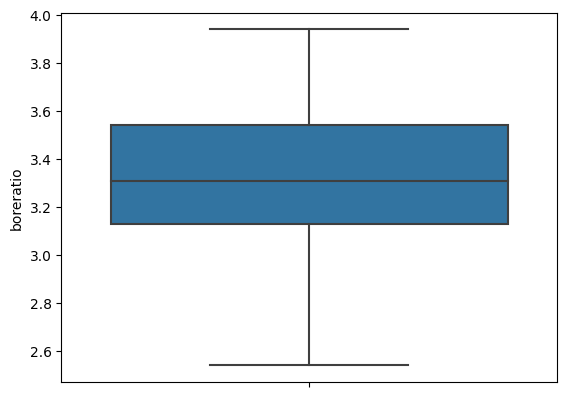

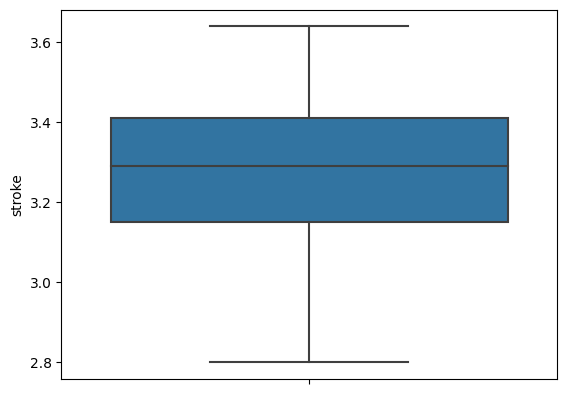

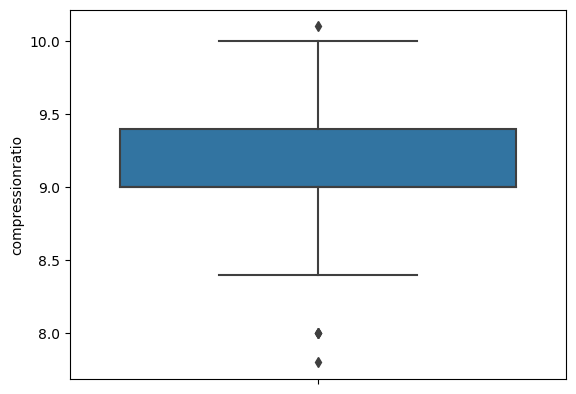

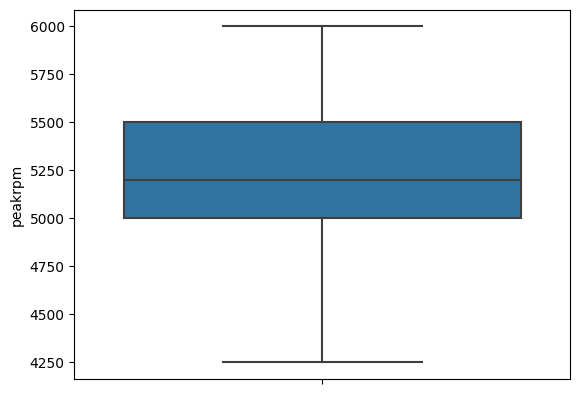

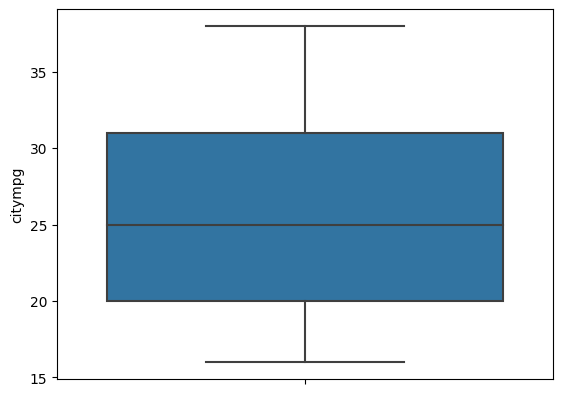

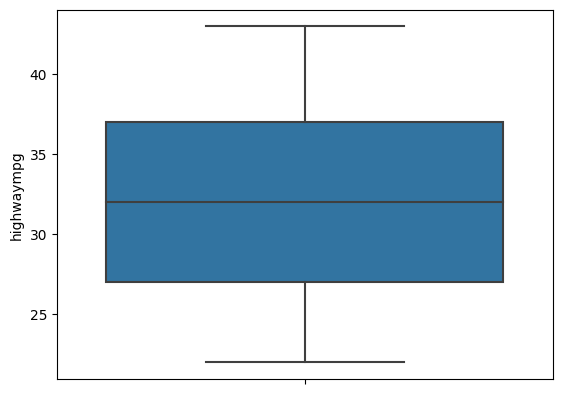

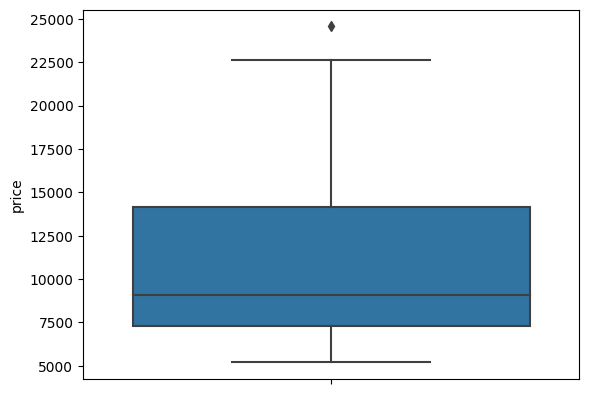

In [16]:
for i in num:
    q1 = df1[i].quantile(0.25)
    q3 = df1[i].quantile(0.75)
    iqr = q3-q1
    ul = q3+ 1.5*iqr
    ll = q1- 1.5*iqr
    df1 = df1[(df1[i]<=ul)&(df1[i]>=ll)]
    plt.figure()
    sns.boxplot(y=i,data=df1)

In [17]:
num.remove('price')

In [18]:
# Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [19]:
df1[num] = ss.fit_transform(df1[num])

In [20]:
df1[num]

,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,citympg,highwaympg
2,-0.707887,-0.039219,0.092694,-0.535970,1.259118,-2.327599,1.279334,-0.179893,-0.668492,-1.188761,-0.977872
3,0.464243,0.458841,0.546892,0.248385,-0.266914,-0.307551,0.857113,2.247235,0.650754,-0.309019,-0.274750
4,0.375780,0.458841,0.676663,0.248385,0.691292,-0.307551,0.857113,-2.607021,0.650754,-1.364710,-1.680995
5,0.464243,0.523404,0.611778,-0.246997,0.691292,-0.307551,0.857113,-1.393457,0.650754,-1.188761,-1.153653
10,0.773862,0.477288,-0.361505,0.248385,-0.302403,0.920322,-2.761922,-0.665319,1.442302,-0.484967,-0.450530
...,...,...,...,...,...,...,...,...,...,...,...
201,1.459447,1.584087,1.195748,1.569403,0.868737,2.029368,-0.650818,1.033671,0.386905,-0.309019,-0.626311
204,2.520999,1.584087,2.298802,0.743766,0.868737,2.029368,-0.650818,1.033671,0.386905,-0.484967,-0.626311
205,2.520999,1.584087,2.233916,0.743766,0.868737,2.029368,-0.650818,-0.908031,0.123056,-1.188761,-1.153653
206,2.520999,1.584087,2.298802,0.743766,2.004389,1.237192,-2.339701,-0.665319,0.650754,-1.364710,-1.505214


In [21]:
cat.remove('drivewheels')

In [22]:
from sklearn.linear_model import LogisticRegression
df1['drivewheels'].replace({'4wd':1, 'fwd' :2,'rwd':3,})
df1_lg = pd.get_dummies(df1,columns=cat,drop_first =True)

In [23]:
# df1_lg['drivewheels']=df1_lg['drivewheels'].replace({'4wd':1, 'fwd' :2,'rwd':3})

In [24]:
df1_lg

,drivewheels,wheelbase,carlength,carwidth,carheight,enginesize,boreratio,stroke,compressionratio,peakrpm,...,enginetype_ohc,enginetype_ohcv,enginetype_rotor,cylindernumber_four,cylindernumber_six,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mpfi,fuelsystem_spfi
2,rwd,-0.707887,-0.039219,0.092694,-0.535970,1.259118,-2.327599,1.279334,-0.179893,-0.668492,...,0,1,0,0,1,0,0,0,1,0
3,fwd,0.464243,0.458841,0.546892,0.248385,-0.266914,-0.307551,0.857113,2.247235,0.650754,...,1,0,0,1,0,0,0,0,1,0
4,4wd,0.375780,0.458841,0.676663,0.248385,0.691292,-0.307551,0.857113,-2.607021,0.650754,...,1,0,0,0,0,0,0,0,1,0
5,fwd,0.464243,0.523404,0.611778,-0.246997,0.691292,-0.307551,0.857113,-1.393457,0.650754,...,1,0,0,0,0,0,0,0,1,0
10,rwd,0.773862,0.477288,-0.361505,0.248385,-0.302403,0.920322,-2.761922,-0.665319,1.442302,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,rwd,1.459447,1.584087,1.195748,1.569403,0.868737,2.029368,-0.650818,1.033671,0.386905,...,1,0,0,1,0,0,0,0,1,0
204,rwd,2.520999,1.584087,2.298802,0.743766,0.868737,2.029368,-0.650818,1.033671,0.386905,...,1,0,0,1,0,0,0,0,1,0
205,rwd,2.520999,1.584087,2.233916,0.743766,0.868737,2.029368,-0.650818,-0.908031,0.123056,...,1,0,0,1,0,0,0,0,1,0
206,rwd,2.520999,1.584087,2.298802,0.743766,2.004389,1.237192,-2.339701,-0.665319,0.650754,...,0,1,0,0,1,0,0,0,1,0


In [25]:
X_lg = df1_lg.drop('drivewheels', axis=1)
y_lg = df1_lg['drivewheels']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X_lg,y_lg, test_size = 0.2, random_state=9)

In [30]:
lg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lg

LogisticRegression(multi_class='multinomial')

In [31]:
lg.fit(X_train, y_train)

C:\Users\Win 10 Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [32]:
y_pred = lg.predict(X_test)
y_pred

array(['rwd', 'fwd', 'fwd', 'rwd', 'fwd', 'fwd', 'fwd', 'fwd', 'rwd',
       'fwd', 'rwd', 'fwd', 'rwd', 'fwd', 'fwd', 'fwd', 'rwd', 'fwd',
       'fwd', 'rwd', 'fwd', 'fwd', 'fwd', 'rwd'], dtype=object)

In [33]:
len(y_pred)

24

In [34]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7916666666666666

In [35]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  1,  0],
       [ 0, 14,  3],
       [ 0,  1,  5]], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
accuracy_score(y_test,y_pred)

0.7916666666666666

In [41]:
f1_score(y_test,y_pred, average='macro')

0.5209235209235209

In [42]:
precision_score(y_test,y_pred, average='macro')

C:\Users\Win 10 Pro\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5

In [43]:
recall_score(y_test,y_pred, average='macro')

0.5522875816993463